In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
clientes = pd.read_csv('data\e-comerce_Olist_dataset\olist_customers_dataset.csv')
geolocalizacion = pd.read_csv('data\e-comerce_Olist_dataset\olist_geolocation_dataset.csv')
items = pd.read_csv('data\e-comerce_Olist_dataset\olist_order_items_dataset.csv', parse_dates=['shipping_limit_date'])
metodo_de_pago = pd.read_csv('data\e-comerce_Olist_dataset\olist_order_payments_dataset.csv')
reviews = pd.read_csv('data\e-comerce_Olist_dataset\olist_order_reviews_dataset.csv', parse_dates=['review_creation_date', 'review_answer_timestamp'])
ordenes = pd.read_csv('data\e-comerce_Olist_dataset\olist_orders_dataset.csv', parse_dates=['order_purchase_timestamp', 'order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date'])
productos = pd.read_csv('data\e-comerce_Olist_dataset\olist_products_dataset.csv')
vendedores = pd.read_csv('data\e-comerce_Olist_dataset\olist_sellers_dataset.csv')
productos_info = pd.read_csv('data\e-comerce_Olist_dataset\product_category_name_translation.csv')

In [3]:
def nulls_percentage(df):
    rows_null = df.isna().sum().values.max()
    total_rows = df.shape[0]

    return round((rows_null / total_rows) * 100, 2)

In [4]:
reviews.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

In [5]:
review_whitout_comment = reviews.drop(columns=['review_comment_title','review_comment_message'])
review_whitout_comment.head(3)

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17,2018-02-18 14:36:24


In [6]:
dataframes_null_report = {
    'df_names': [
        'customer',
        'geolocation',
        'item',
        'order',
        'payment',
        'product',
        'productos_info',
        'review',
        'review_whitout_comment',
        'seller'
    ],
    'total_rows': [
        clientes.shape[0],
        geolocalizacion.shape[0],
        items.shape[0],
        ordenes.shape[0],
        metodo_de_pago.shape[0],
        productos.shape[0],
        productos_info.shape[0],
        reviews.shape[0],
        review_whitout_comment.shape[0],
        vendedores.shape[0]
    ],
    'nulls_percentage': [
        nulls_percentage(clientes),
        nulls_percentage(geolocalizacion),
        nulls_percentage(items),
        nulls_percentage(ordenes),
        nulls_percentage(metodo_de_pago),
        nulls_percentage(productos),
        nulls_percentage(productos_info),
        nulls_percentage(reviews),
        nulls_percentage(review_whitout_comment),
        nulls_percentage(vendedores)
    ]
}

In [7]:
nulls_report = pd.DataFrame(dataframes_null_report)
nulls_report

,df_names,total_rows,nulls_percentage
0,customer,99441,0.00
1,geolocation,19015,0.00
2,item,112650,0.00
3,order,99441,2.98
4,payment,103886,0.00
5,product,32951,1.85
6,productos_info,71,0.00
7,review,99224,88.34
8,review_whitout_comment,99224,0.00
9,seller,3095,0.00


In [8]:
only_nulls = nulls_report[nulls_report['nulls_percentage'] != 0]
only_nulls

,df_names,total_rows,nulls_percentage
3,order,99441,2.98
5,product,32951,1.85
7,review,99224,88.34


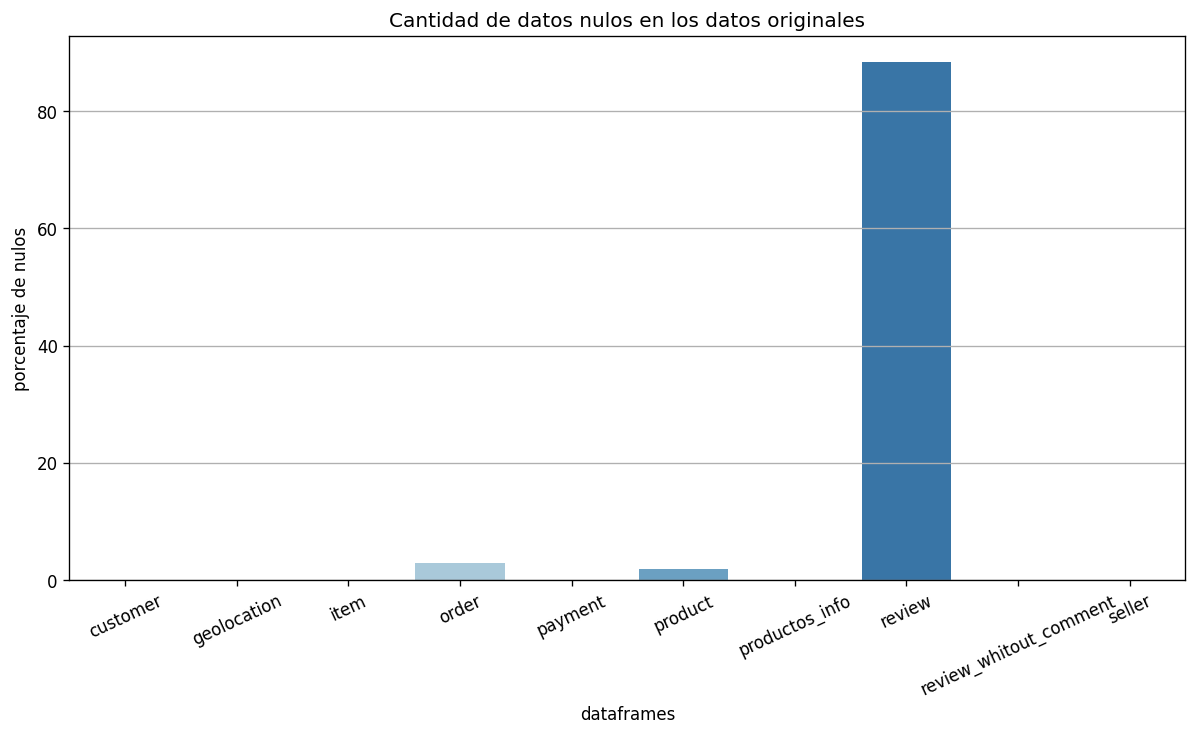

In [14]:
plt.figure(figsize=(12,6), dpi=120)
plt.grid()
sns.barplot(data=nulls_report, x='df_names', y='nulls_percentage', palette='Blues')
plt.xticks(rotation=25)
plt.xlabel('dataframes')
plt.ylabel('porcentaje de nulos')
plt.title('Cantidad de datos nulos en los datos originales')
plt.show()

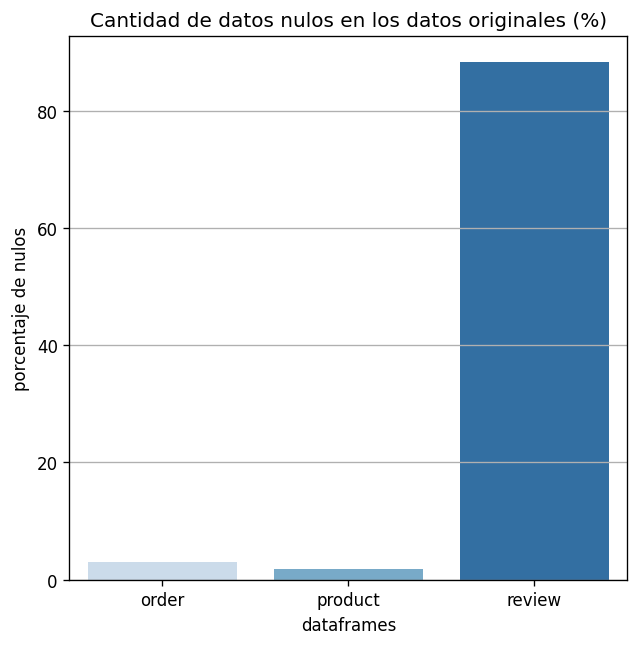

In [15]:
plt.figure(figsize=(6,6), dpi=120)
plt.grid()
sns.barplot(data=only_nulls, x='df_names', y='nulls_percentage', palette='Blues')
# plt.xticks(rotation=25)
plt.xlabel('dataframes')
plt.ylabel('porcentaje de nulos')
plt.title('Cantidad de datos nulos en los datos originales (%)')
plt.show()

## BOXPLOTS

In [11]:
ordenes.sample(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
32067,effac4ec58d76962fb4ffbee25d18215,3472d285196e1db5246524096e7fd618,delivered,2017-07-08 21:39:03,2017-07-11 03:50:19,2017-07-11 17:20:00,2017-07-25 14:33:24,2017-08-14
62434,eb2e026bae01f340ff4c0cc9aad6aecd,c69ae1f41ba74509e754afb5b49fb29d,delivered,2017-07-06 14:49:01,2017-07-08 03:25:50,2017-07-11 11:56:40,2017-07-18 16:14:59,2017-08-01
78137,13ef6b72bc3af6724e7d53bd84019b24,ea361251491228e4d24754e2d33b30e7,delivered,2018-06-15 10:58:15,2018-06-15 11:22:37,2018-06-18 10:57:00,2018-06-25 23:41:54,2018-07-13


In [13]:
productos.sample(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
21599,6f5c977cd6fb4cea20db551bc8728ff9,cama_mesa_banho,56.0,552.0,1.0,2200.0,38.0,8.0,30.0
10400,cea2c8d87c3a6672684f57374dfc5703,pet_shop,39.0,208.0,2.0,200.0,16.0,2.0,11.0
23593,5059d375bec8f42bb1638f120d5a1e55,informatica_acessorios,60.0,129.0,3.0,500.0,40.0,11.0,30.0


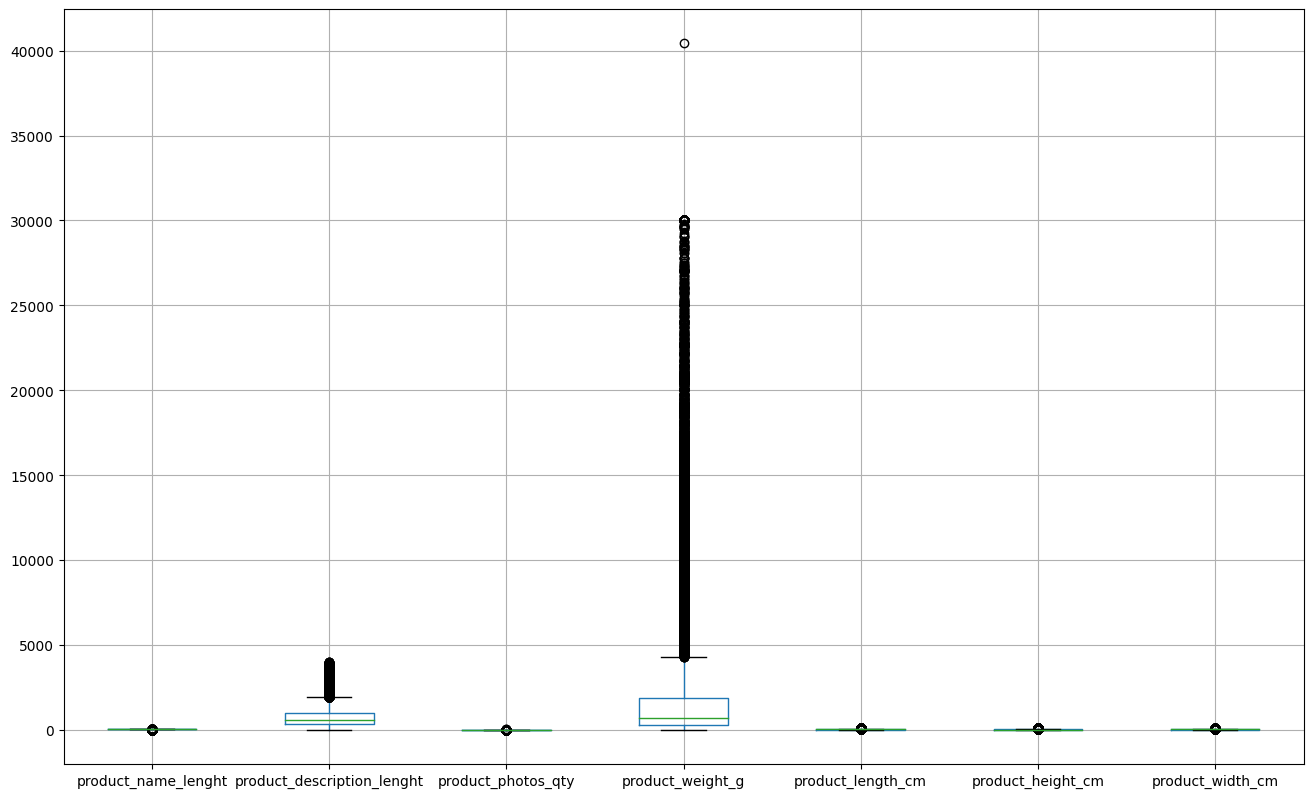

In [32]:
plt.figure(figsize=(16,10), dpi=100)
productos.boxplot()
plt.show()

In [16]:
geolocalizacion.sample(3)

,Id_Geolocalizacion,zip_code_prefix,Latitud,Longitud,Ciudad,Estado
16809,16809,85861,-25.501026,-54.557817,foz do iguacu,PR
14812,14812,74310,-16.698891,-49.294572,goiania,GO
9686,9686,39270,-17.340845,-44.933534,pirapora,MG


In [17]:
items.sample(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
32817,4a5dd77c42df1a4cf21c142eaacf866f,1,06f18114503e7543d81252fd61a53df8,0adac9fbd9a2b63cccaac4f8756c1ca8,2017-05-25 09:15:08,199.9,17.16
62115,8dca52c1ec5a814dc9ebd26524ae8b3e,1,726e355b119d1f8186283de59fc5b702,dbc22125167c298ef99da25668e1011f,2017-11-17 12:27:45,129.9,18.16
50521,72ca7a0edf21ea90416daca244df80ab,1,1df9ea4c24394047de1837c6f00673b3,897060da8b9a21f655304d50fd935913,2017-12-18 21:12:01,30.1,15.10


In [18]:
metodo_de_pago.sample(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
48137,09f929ce6d526af69a12f1a54230e396,1,credit_card,3,40.85
18038,63014d31686df70fb6eae36739a89d52,1,credit_card,1,69.52
100136,01f48b2a27229e667db384b5b9d5dfa4,1,credit_card,3,68.19


In [33]:
metodo_de_pago.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [19]:
vendedores.sample(3)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
1977,8d92f3ea807b89465643c219455e7369,3052,sao paulo,SP
1455,13f57c12a00ed4610db646b913a7f5c6,11015,santos,SP
2587,85cc55e048b6bcc90c75afe7f0e72f72,27345,barra mansa,RJ
